In [1]:
#Import packages of interest
import csv
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
#from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_columns=300
pd.options.display.max_rows=100
# Needed to scale PCA
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (15,15)

## Reading and Preprocessing the Data

set timestamp column to timestamp datatype

sort by psn and timestamp

drop rows with NAs

reset the index

In [2]:
try:
    model_number = 2

    store = MachineDataStore('.config')

    # model_data_hr = (store.query(model_number,'1hr')
    #                  .not_null(['timestamp','psn'])
    # #                  .exclude_psn([44,52,54,70])
    #                  .execute())

    model2_10min = (store.query(model_number,'10min')
                      .not_null(['timestamp','psn'])
                      .exclude_psn([44,52,54,70])
                      .execute())
except:
    print('reading from csv')
    ## backup method in case proxy is blocked
    model2_10min = pd.read_csv('../../../data/raw_data_model2_10min.csv')
    
    
## convert all to timestamps and sort
model2_10min['timestamp'] = model2_10min['timestamp'].apply(lambda x: pd.Timestamp(x))
model2_10min=model2_10min.sort_values(by=['psn','timestamp'],ascending=(True,True))
model2_10min=model2_10min.dropna()
model2_10min=model2_10min.reset_index(drop=True)
print('Shape of model2 10min data: ', model2_10min.shape)
model2_10min.head()

reading from csv
Shape of model2 10min data:  (1602281, 76)


,timestamp,psn,id,lo_c_dp1,f_c_dp1,f_c_dp2,f_c_dp5,pe_c_dt1,g_c_dt1,g_c_dt2,lo_c_dt5,c_dt5_1,c_dt5_2,c_dt5_3,c_dt5_4,c_dt5_5,c_dt5_6,sc_c_pct_e1,pe_c_pos_e1,f_c_pos_e2,f_c_pos_e1,c_c_t5_1,c_c_t5_2,c_c_t5_3,t5_s1,pe_p1,f_cmd1,pe_t1,perf_pow,sum_eng_h,lo_p1,b_p1,g_t1,t5_6,g_t5,g_t4,v_d_1b,g_cur1,g_cur4,g_cur3,lo_t9,f_cmd2,lo_t6,t5_5,t5_2,t5_3,t5_1,ngp,nt5,pcd,v_acc1,sc_pct2,g_pow1,pe_for1,sc_pct1,pe_cmd1,pe_pos1,g_cur2,t1_1,sum_esn,t5_4,f_p2,t5_a,sum_eng_st,lo_dp1,v_d_3b,f_p7,f_p1,v_d_2b,lo_t5,g_t2,f_t1,sum_enr,g_t3,g_pct1,f_pos1
0,2015-12-05 00:00:00.000000,34,1211745,0.230272,0.155038,0.368851,0.185603,0.541111,0.030,0.002,0.438823,-0.068389,0.069944,-0.133055,-0.011389,0.057278,0.085611,0.127131,-0.042950,-0.02556,-0.01372,0.833632,0.374857,0.225570,0.2624,0.602404,0.133358,0.489697,0.615316,0.088200,0.820926,0.09640,0.854857,0.850754,0.4340,0.4776,0.262457,0.319687,0.326496,0.320871,0.898421,0.607376,0.987333,0.845088,0.847621,0.807021,0.819954,0.999599,1.0,0.286693,0.199887,0.959319,-0.9751,0.223349,0.0,0.868627,0.886859,0.322344,0.1605,72.0,0.831354,0.623482,0.833632,111.0,0.223076,0.23472,14.759244,0.617559,0.209029,0.806087,0.846857,0.5450,13.472658,0.4536,0.36426,0.134215
1,2015-12-05 00:10:00.000004,34,1211746,0.279799,0.236221,0.221298,0.186310,0.551111,0.068,0.046,0.472941,-0.062445,0.066222,-0.128444,-0.017778,0.054556,0.087889,0.082469,-0.042950,-0.02698,-0.01170,0.833441,0.370857,0.228597,0.2596,0.600000,0.133484,0.495758,0.614241,0.088200,0.844706,0.11170,0.853714,0.851019,0.4636,0.4664,0.265029,0.320982,0.326763,0.321004,0.897895,0.607689,0.973333,0.844353,0.846686,0.807753,0.820952,0.999699,1.0,0.285623,0.204233,0.960060,-0.9750,0.218476,0.0,0.868627,0.886859,0.322902,0.1610,72.0,0.829886,0.624072,0.833441,111.0,0.276924,0.24372,14.747893,0.618634,0.206800,0.809565,0.847429,0.5450,13.575190,0.4840,0.36368,0.134215
2,2015-12-05 00:19:59.999998,34,1211747,0.276643,0.168140,0.351799,0.186543,0.536667,0.084,0.062,0.465882,-0.064889,0.072778,-0.128222,-0.014222,0.052444,0.082111,0.102534,-0.052448,-0.03324,-0.01392,0.832753,0.360571,0.212362,0.2524,0.598558,0.133345,0.486667,0.614557,0.088233,0.815756,0.10420,0.852000,0.849175,0.4272,0.4668,0.272800,0.319933,0.326250,0.320402,0.898421,0.606896,0.966000,0.843241,0.847308,0.807108,0.819775,1.000000,1.0,0.286070,0.200193,0.960060,-0.9762,0.221725,0.0,0.868441,0.886859,0.322187,0.1600,72.0,0.829908,0.624072,0.832753,111.0,0.276924,0.23728,14.769169,0.618157,0.205543,0.802174,0.845714,0.5450,13.677975,0.4884,0.35851,0.134215
3,2015-12-05 00:30:00.000003,34,1211748,0.252293,0.055179,0.419899,0.186505,0.530000,0.032,0.026,0.438824,-0.062723,0.069277,-0.124722,-0.018389,0.049944,0.086611,0.129267,-0.058598,-0.02482,-0.01172,0.832454,0.362286,0.217166,0.2536,0.597116,0.133483,0.483030,0.616013,0.088233,0.822994,0.08825,0.851429,0.849776,0.4644,0.4668,0.266686,0.325871,0.333571,0.326451,0.898947,0.607422,0.982667,0.842443,0.846310,0.807510,0.819910,1.000401,1.0,0.286790,0.188440,0.960060,-0.9613,0.195735,0.0,0.868321,0.886859,0.328638,0.1600,72.0,0.828776,0.623482,0.832454,111.0,0.246152,0.24264,14.790450,0.618336,0.209571,0.803043,0.849714,0.5450,13.780506,0.4856,0.36771,0.134215
4,2015-12-05 00:39:59.999997,34,1211749,0.299697,0.115222,0.436924,0.185084,0.530000,0.032,0.016,0.438824,-0.063444,0.064889,-0.132111,-0.007444,0.054889,0.083222,0.090337,-0.042950,-0.01256,-0.00842,0.833556,0.369143,0.224172,0.2584,0.597116,0.133689,0.481818,0.616646,0.088233,0.819892,0.10175,0.856571,0.850201,0.4436,0.4728,0.257429,0.325714,0.334375,0.327433,0.899474,0.608590,0.988667,0.844534,0.846534,0.807134,0.820868,1.000201,1.0,0.286712,0.192200,0.960429,-0.9608,0.228222,0.0,0.868627,0.886859,0.329152,0.1590,72.0,0.832068,0.622301,0.833556,111.0,0.289744,0.23900,14.743637,0.616186,0.217943,0.806957,0.852000,0.5445,13.882785,0.4780,0.37120,0.134215


In [5]:
## same with model 1 1hr

model1_1hr = pd.read_csv('../../../data/raw_data_model1.csv')
    
    
## convert all to timestamps and sort
model1_1hr['timestamp'] = model1_1hr['timestamp'].apply(lambda x: pd.Timestamp(x))
model1_1hr=model1_1hr.sort_values(by=['psn','timestamp'],ascending=(True,True))
model1_1hr=model1_1hr.dropna()
model1_1hr=model1_1hr.reset_index(drop=True)
print('Shape of model2 10min data: ', model1_1hr.shape)


model2_1hr = pd.read_csv('../../../data/raw_data_model2.csv')
    
    
## convert all to timestamps and sort
model2_1hr['timestamp'] = model2_1hr['timestamp'].apply(lambda x: pd.Timestamp(x))
model2_1hr=model2_1hr.sort_values(by=['psn','timestamp'],ascending=(True,True))
model2_1hr=model2_1hr.dropna()
model2_1hr=model2_1hr.reset_index(drop=True)
print('Shape of model2 10min data: ', model2_1hr.shape)

Shape of model2 10min data:  (76833, 146)
Shape of model2 10min data:  (166500, 78)


# Statistical Functions

### find outliers by stdev

classifies datapoints outside of a defined standard deviation threshold from either median or mean as an outlier

In [4]:
def stdev_outlier(df,ignore_columns=None,midpoint='median',threshold=2.5):
## function will take stdev on whole df fed to it
    returndf = pd.DataFrame()
    for i in df.columns:
        if i in ignore_columns:
            returndf[i] = df[i]
            continue
        if midpoint == 'median':
            midpoint = '50%'
        elif midpoint in ['average','avg','mean']:
            midpoint = 'mean'
        desc = df[i].describe()
        max_cutoff = desc[midpoint]+int(threshold)*desc['std']
        min_cutoff = desc[midpoint]-int(threshold)*desc['std']
        returndf[i] = df[i].apply(lambda x: 0 if min_cutoff<x<max_cutoff else 1)
    return(returndf)

In [5]:
model1_1hr_stdev_outlier = stdev_outlier(model1_1hr,['timestamp','sum_eng_st','sum_esn','sum_eng_h','psn','id'], midpoint='mean')
model2_10min_stdev_outlier = stdev_outlier(model2_10min,['timestamp','sum_eng_st','sum_esn','sum_eng_h','psn','id'], midpoint='mean')

In [6]:
model2_10min_stdev_outlier.head()

,timestamp,psn,id,lo_c_dp1,f_c_dp1,f_c_dp2,f_c_dp5,pe_c_dt1,g_c_dt1,g_c_dt2,lo_c_dt5,c_dt5_1,c_dt5_2,c_dt5_3,c_dt5_4,c_dt5_5,c_dt5_6,sc_c_pct_e1,pe_c_pos_e1,f_c_pos_e2,f_c_pos_e1,c_c_t5_1,c_c_t5_2,c_c_t5_3,t5_s1,pe_p1,f_cmd1,pe_t1,perf_pow,sum_eng_h,lo_p1,b_p1,g_t1,t5_6,g_t5,g_t4,v_d_1b,g_cur1,g_cur4,g_cur3,lo_t9,f_cmd2,lo_t6,t5_5,t5_2,t5_3,t5_1,ngp,nt5,pcd,v_acc1,sc_pct2,g_pow1,pe_for1,sc_pct1,pe_cmd1,pe_pos1,g_cur2,t1_1,sum_esn,t5_4,f_p2,t5_a,sum_eng_st,lo_dp1,v_d_3b,f_p7,f_p1,v_d_2b,lo_t5,g_t2,f_t1,sum_enr,g_t3,g_pct1,f_pos1
0,2015-12-05 00:00:00.000000,34,1211745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-12-05 00:10:00.000004,34,1211746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-12-05 00:19:59.999998,34,1211747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-12-05 00:30:00.000003,34,1211748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-12-05 00:39:59.999997,34,1211749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0


### Find Outliers by IQR

classifies datapoints outside of the interquartile range as an outlier

In [7]:
def quantile_outlier(df,ignore_columns=None):
## don't call this function. it gets called by iqr_outlier
    returndf = pd.DataFrame()
    for i in df.columns:
        if i in ignore_columns:
            returndf[i] = df[i]
            continue
        q3 = df[i].quantile(0.75)
        q1 = df[i].quantile(0.25)
        max_cutoff = q3+(1.5*(q3-q1))
        min_cutoff = q1-(1.5*(q3-q1))
        returndf[i] = df[i].apply(lambda x: 0 if min_cutoff<x<max_cutoff else 1)
    return(returndf)


def iqr_outlier(df, bypsn=False,ignore_columns=None):
## feed this a fleetwide dataframe
    returndf = pd.DataFrame()
    if bypsn==True:
        for i in list(set(df['psn'].dropna().values)):
            tempdf = df[df['psn']==i]
            df_quantile_outlier = quantile_outlier(tempdf,['timestamp','sum_eng_st','sum_esn','sum_eng_h','psn'])
            returndf = returndf.append(df_quantile_outlier, ignore_index=True)
    else:
        returndf = quantile_outlier(df,ignore_columns)
    return(returndf)

In [8]:
model2_10min_quantile_outlier = iqr_outlier(model2_10min,bypsn=False,ignore_columns=['timestamp','sum_eng_st','sum_esn','sum_eng_h','psn','id'])

In [9]:
model2_10min_quantile_outlier.head()

,timestamp,psn,id,lo_c_dp1,f_c_dp1,f_c_dp2,f_c_dp5,pe_c_dt1,g_c_dt1,g_c_dt2,lo_c_dt5,c_dt5_1,c_dt5_2,c_dt5_3,c_dt5_4,c_dt5_5,c_dt5_6,sc_c_pct_e1,pe_c_pos_e1,f_c_pos_e2,f_c_pos_e1,c_c_t5_1,c_c_t5_2,c_c_t5_3,t5_s1,pe_p1,f_cmd1,pe_t1,perf_pow,sum_eng_h,lo_p1,b_p1,g_t1,t5_6,g_t5,g_t4,v_d_1b,g_cur1,g_cur4,g_cur3,lo_t9,f_cmd2,lo_t6,t5_5,t5_2,t5_3,t5_1,ngp,nt5,pcd,v_acc1,sc_pct2,g_pow1,pe_for1,sc_pct1,pe_cmd1,pe_pos1,g_cur2,t1_1,sum_esn,t5_4,f_p2,t5_a,sum_eng_st,lo_dp1,v_d_3b,f_p7,f_p1,v_d_2b,lo_t5,g_t2,f_t1,sum_enr,g_t3,g_pct1,f_pos1
0,2015-12-05 00:00:00.000000,34,1211745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-12-05 00:10:00.000004,34,1211746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-12-05 00:19:59.999998,34,1211747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-12-05 00:30:00.000003,34,1211748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-12-05 00:39:59.999997,34,1211749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,0,0,0,0,0,0,0,0,0,0


### Find Outliers by Global Limit

classifies datapoints outside their normalized global limits as outliers

In [10]:
def globallimit_outliers(df,ignore_columns=None):
    returndf = pd.DataFrame()
    
    if isinstance(ignore_columns,list):
        pass
    else:
        ignore_columns = []
    
    for i in df.columns:
        if i in ignore_columns:
            returndf[i] = df[i]
            
        else:
            returndf[i] = df[i].apply(lambda x: 0 if -1.2<x<1.2 else 1)
    return(returndf)

In [11]:
model2_10min_globallimit_outlier = globallimit_outliers(model2_10min, ignore_columns=['timestamp','sum_eng_st','sum_esn','sum_eng_h','psn','id'])

In [12]:
model2_10min_globallimit_outlier.head()

,timestamp,psn,id,lo_c_dp1,f_c_dp1,f_c_dp2,f_c_dp5,pe_c_dt1,g_c_dt1,g_c_dt2,lo_c_dt5,c_dt5_1,c_dt5_2,c_dt5_3,c_dt5_4,c_dt5_5,c_dt5_6,sc_c_pct_e1,pe_c_pos_e1,f_c_pos_e2,f_c_pos_e1,c_c_t5_1,c_c_t5_2,c_c_t5_3,t5_s1,pe_p1,f_cmd1,pe_t1,perf_pow,sum_eng_h,lo_p1,b_p1,g_t1,t5_6,g_t5,g_t4,v_d_1b,g_cur1,g_cur4,g_cur3,lo_t9,f_cmd2,lo_t6,t5_5,t5_2,t5_3,t5_1,ngp,nt5,pcd,v_acc1,sc_pct2,g_pow1,pe_for1,sc_pct1,pe_cmd1,pe_pos1,g_cur2,t1_1,sum_esn,t5_4,f_p2,t5_a,sum_eng_st,lo_dp1,v_d_3b,f_p7,f_p1,v_d_2b,lo_t5,g_t2,f_t1,sum_enr,g_t3,g_pct1,f_pos1
0,2015-12-05 00:00:00.000000,34,1211745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015-12-05 00:10:00.000004,34,1211746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,1,0,0,0,0,0,1,0,0,0
2,2015-12-05 00:19:59.999998,34,1211747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,1,0,0,0,0,0,1,0,0,0
3,2015-12-05 00:30:00.000003,34,1211748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,1,0,0,0,0,0,1,0,0,0
4,2015-12-05 00:39:59.999997,34,1211749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.088233,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.0,0,0,0,111.0,0,0,1,0,0,0,0,0,1,0,0,0


### Find Powerjumps

find where the power of the machinery jumps significantly. Transients are defined as a jump in power over 25%

In [16]:
def find_power_step (df,powercol,jump = 0.25):
    ## function will return another dataframe where the power columns is replace with 1s and 0s. 1 represents an outlier.
    ## the returned dataframe is also offset by 1 index since we are finding differences in datapoints.
    ## assumes data coming in is sorted by psn by timestamp.

    
    df = df[[powercol,'timestamp','psn']]

    df = df.where((pd.notnull(df)),np.nan) ## replaces nulls with nans for math stuffs.
    df2 = pd.DataFrame(index = df.index.values[1:],columns = df.columns.values)
    df2['timestamp'] = df['timestamp'].values[1:]
    ## np.divide will divide the first parameter by the second parameter so the resulting series starts
    ## from the original dataframe's 1st item, not the 0th item.
#     shifted = pd.Series(np.subtract(df[powercol].values[1:],df[powercol].values[:-1]),index=df.index.values[:-1])

    shifted = pd.Series(np.divide(df[powercol].values[:-1],df[powercol].values[1:]),index=df.index.values[1:])-1

    ## take all values and subtract from previous values. if unchanging, then result will be 0
    ## create numpy array of all False

    tomap = np.zeros(len(df2),dtype=int)  
    
    
    ## find where jumps in data are greater than given jump parameter, and set numpy array equal to True in those positions
    for j in shifted[abs(shifted)>=jump].index.values:
        ## for now just doing where power jumps.
        ## does not catch all in betweens since transients are only 10-20 mins long.
        if (df.loc[j]['timestamp'] - df.loc[j-1]['timestamp']) > pd.Timedelta('70 minutes'): ## if data is not continuous
            continue
                        
        else:
            tomap[j] = True


    
    ## map back numpy array to df2
    df2[powercol] = pd.Series(tomap).loc[1:]

    df2.loc[0] = [0,df.loc[0]['timestamp'],0] ## assume not outlier for row 0. this also 0-indexes the dataframe again
    df2 = df2.sort_index()
    df2['psn'] = df['psn']
    return(df2)


In [14]:
model1_1hr_powerstep = find_power_step(model1_1hr,'pcd')

In [18]:
model2_1hr_powerstep = find_power_step(model2_1hr,'perf_pow')

### Find Flatline

Find sections of the data where the values are completely not changing at all. This is useful for potentially finding sections of data where a sensor/valve got stuck. This is different from a machine running at a steady state because there will still be very slight fluctuations in the readings

In [23]:
def find_flatline(df,threshold=12):
    """
    df: input dataframe
    threshold: number of datapoints ahead to look for a flatline 
    
    """
    
    
    df = df.where((pd.notnull(df)),np.nan) ## replaces nulls with nans for math stuffs.
    df2 = pd.DataFrame(index = df.index.values[1:],columns = df.columns.values)
    for i in df.columns.values:
        if i in ['timestamp','sum_esn','sum_eng_st','id','psn']:
            df2[i] = df[i].values[1:]
            continue
        ## take all values and subtract from previous values. if unchanging, then result will be 0
        shifted = pd.Series(np.subtract(df[i].values[1:],df[i].values[:-1]),index=df.index.values[1:])
        ## create numpy array of all False
        tomap = np.zeros(len(df2),dtype=int)
        
    ## find where n-threshold values are all 0, and set numpy array equal to True in those positions
        for j in shifted[shifted==0].index.values:
            if j+threshold > len(shifted):
                continue
            elif sum(np.abs(shifted.loc[j:j+threshold]))==0:
                tomap[j:j+threshold] = True
            else:
                continue

    
    ## map back numpy array to df2
        df2[i] = pd.Series(tomap).shift(1).loc[1:]
    df2.loc[0] = 0 ## assume not outlier for row 0. this also 0-indexes the dataframe again
    return(df2)

In [24]:
model1_1hr_flatline = find_flatline(model1_1hr,12)
model2_1hr_flatline = find_flatline(model2_1hr,12)

In [ ]:
model2_1hr_flatline.head()

### Find Stepsizes

Finds where data jumps significantly. Useful for finding large changes across multiple columns

In [35]:
def efficient_stepsize (inputdf,ignore_columns=None,threshold = 3):
    psns =  sorted(inputdf['psn'].unique())
    if ignore_columns == None:
        cols = inputdf.columns
    elif isinstance(ignore_columns,list):
        cols = [a for a in inputdf.columns if a not in list(ignore_columns)]
    else:
        raise Exception('ignore_columns must be list or None')
    no_timestamp_cols = [j for j in cols if j != 'timestamp']
    finaldf = pd.DataFrame(columns=inputdf.columns)

    for psn in psns:
#         print(psn)

        ## subset dataframe to just one psn
        onepackage = inputdf[inputdf['psn']==psn].sort_values(by='timestamp',ascending=True)
        
        ## subset to just columns we want to run stepsize on
        df = onepackage[cols]
        
        ## create datetimeindex
        df = df.reset_index()
        df = df.set_index(pd.DatetimeIndex(onepackage['timestamp']))
        
        # bin periods
        avgs = df.rolling('7d',min_periods=1008).mean() ## 7days*24hrs=168 datapoints for 1 hr data
        stdevs= df.rolling('7d',min_periods=1008).std() ## use 7days*144hrs=1008 for 10min

        
        ## create low and high cutoffs
        highcutoff = avgs+threshold*stdevs
        lowcutoff = avgs-threshold*stdevs
        
        ## build return df
        highs = df > highcutoff ## True if above high cutoff
        lows = df < lowcutoff ## True if below high cutoff
        returndf = highs|lows
        
        ## put back the columns we ignored earlier with original values
        returndf['index'] = onepackage.index
        
        ## to keep consistency with other functions, cast true/false bools to ints
        returndf = returndf.astype(int)
        

        ## remove datetimeindex and re-set the original index
        returndf = returndf.reset_index().set_index('index')

        ## add back in the ignored columns
        for col in ignore_columns:
            returndf[col]=onepackage[col]
        
        
        ## append it to finaldf
        finaldf = finaldf.append(returndf)

        
    return(finaldf)




In [36]:
model2_10min_stepsize_finder = efficient_stepsize(model2_10min,ignore_columns=['id','timestamp','sum_esn','psn']) 
model2_10min_stepsize_finder = model2_10min_stepsize_finder.sort_index()

In [37]:
model2_10min_stepsize_finder.head()

,b_p1,c_c_t5_1,c_c_t5_2,c_c_t5_3,c_dt5_1,c_dt5_2,c_dt5_3,c_dt5_4,c_dt5_5,c_dt5_6,f_c_dp1,f_c_dp2,f_c_dp5,f_c_pos_e1,f_c_pos_e2,f_cmd1,f_cmd2,f_p1,f_p2,f_p7,f_pos1,f_t1,g_c_dt1,g_c_dt2,g_cur1,g_cur2,g_cur3,g_cur4,g_pct1,g_pow1,g_t1,g_t2,g_t3,g_t4,g_t5,id,lo_c_dp1,lo_c_dt5,lo_dp1,lo_p1,lo_t5,lo_t6,lo_t9,ngp,nt5,pcd,pe_c_dt1,pe_c_pos_e1,pe_cmd1,pe_for1,pe_p1,pe_pos1,pe_t1,perf_pow,psn,sc_c_pct_e1,sc_pct1,sc_pct2,sum_eng_h,sum_eng_st,sum_enr,sum_esn,t1_1,t5_1,t5_2,t5_3,t5_4,t5_5,t5_6,t5_a,t5_s1,timestamp,v_acc1,v_d_1b,v_d_2b,v_d_3b
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1211745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,72.0,0,0,0,0,0,0,0,0,0,2015-12-05 00:00:00.000000,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1211746,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,72.0,0,0,0,0,0,0,0,0,0,2015-12-05 00:10:00.000004,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1211747,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,72.0,0,0,0,0,0,0,0,0,0,2015-12-05 00:19:59.999998,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1211748,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,72.0,0,0,0,0,0,0,0,0,0,2015-12-05 00:30:00.000003,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1211749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,72.0,0,0,0,0,0,0,0,0,0,2015-12-05 00:39:59.999997,0,0,0,0


### find normal running

Finds where machinery is running normally and no values are exceeding their limits

In [29]:
def find_normal_running(df,threshold=1.2): 
## returns empty dataframes. i think it's correct though and 
## we just don't have data where not running over normalized value of 1.
    psns = sorted(df['psn'].unique())
    
    ## columns for sure will be over 1 b/c not normalized
    highcols = ['id','timestamp','sum_eng_st','psn','sum_esn','f_p7','v_g_1a','v_g_1b','v_g_2a','v_g_2b','v_g_3a','v_g_3b','v_g_4a','v_g_4b','v_g_5a','v_g_6b','v_g_7']
    
    ## the rest of the columns
    othercols = [i for i in df.columns if i not in highcols]
    
    ## true/false for subset (rest of columns)
    normal_running = df[othercols].applymap(lambda x: True if abs(x)<=threshold else False) 
    
    ## map back to original
    df = df.loc[normal_running.all(axis=1)] 
    
    ## split by psn
    returndict = {psn:df[df['psn']==psn] for psn in psns}  
    
    return(returndict)

In [30]:
model1_1hr_normals = find_normal_running(model1_1hr)
model2_10min_normals = find_normal_running(model2_10min)

In [ ]:
def groupby_psn(df, save_csv=False, title='groupby_df'):
    """
    inputs a dataframe, sets index to timestamp, groupby's psn and saves to csv (if specificed)
    """
    df = df.set_index('id')
    psn_df = df.groupby('psn').sum()
    if save_csv:
        psn_df.to_csv(title+'.csv')
    return psn_df

In [ ]:
# sums rows and columns
stdev_psn = groupby_psn(model1_stdev_outlier)
stdev_psn.sum().sum()

# Plotting Functions

In [ ]:
def plot_col(df, col):
    fig, ax = plt.subplots(figsize=(14,8))
    for key, grp in df.groupby('psn'):
        ax = grp.plot(ax=ax, kind='line', x='timestamp', y=col)

    ax.legend().set_visible(False)
    plt.title(col.upper())

In [ ]:
%matplotlib inline
plot_col(model2_10min, 'pe_c_dt1')

## Outlier Line Plots

In [32]:
def plot_col_outlier_line(df, outlier_df, col,psn='all'):
    if psn == 'all':
        pass
    elif psn in df['psn'].unique():
        df = df[df['psn']==psn]
        outlier_df = outlier_df[outlier_df['psn']==psn]
    else:
        raise Exception('Give a valid psn. PSN given is not an integer or does not exist within the dataframe given')
            
    fig, ax = plt.subplots(figsize=(14,8))
#     df = df[[col,'timestamp','psn']]
    outliers = copy.deepcopy(df[[col,'timestamp','psn']])
    normals = copy.deepcopy(df[[col,'timestamp','psn']])
    
    ## create a list of values with nan for normal and data if outlier
    normal_list = [df.loc[i][col] if outlier_df.loc[i][col]==0 else np.nan for i in df.index.values]
    outlier_list = [df.loc[i][col] if outlier_df.loc[i][col]!=0 else np.nan for i in df.index.values]
    normals[col] = normal_list
    outliers[col] = outlier_list
                
        
    for key, grp in normals.groupby('psn'): ## plot normals in blue
        ax = grp.plot(ax=ax, kind='line', x='timestamp', y=col,c='b')
#     for key, grp in df[outlier_df[col]==0].groupby('psn'): ## plot normal running in blue on top
    for key, grp in outliers.groupby('psn'): ## plot outlier in red on top
        ax = grp.plot(ax=ax, kind='line', x='timestamp', y=col,c='r',zorder=9)
        
#     for key, grp in df[outlier_df[col]>0].groupby('psn'):
#         ax = grp.plot(ax=ax, kind='line', x='timestamp', y=col,c='r')
    ax.legend().set_visible(False)
    plt.title(col.upper())

In [38]:
plot_col_outlier_line(model2_1hr,model2_1hr_stdev_outlier,'pe_c_dt1')

NameError: name 'model2_1hr_stdev_outlier' is not defined

In [ ]:
plot_col_outlier_line(model1_1hr,model1_1hr_stdev_outlier,'perf_c_pr2')

In [34]:
plot_col_outlier_line(model2_10min,model2_10min_flatline,'ngp')

NameError: name 'model2_10min_flatline' is not defined

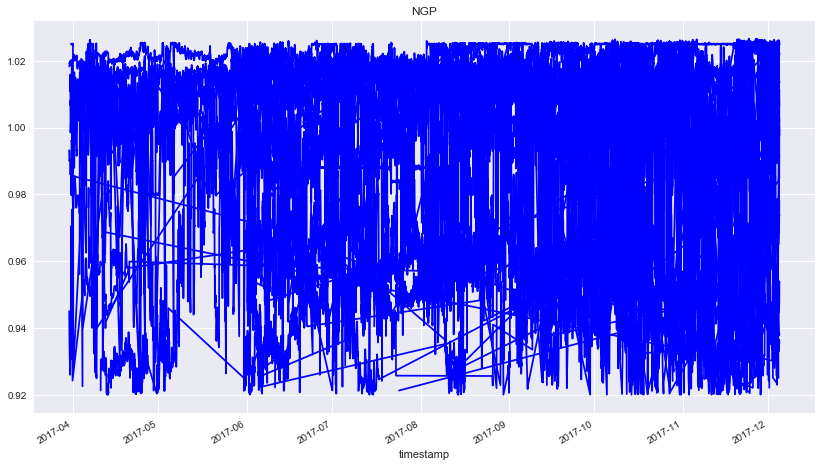

In [35]:
plot_col_outlier_line(model1_1hr,model1_1hr_flatline,'ngp')

## Outlier Scatterplots

In [216]:
def plot_col_outlier_scatter(df, outlier_df, col,psn='all'):
    if psn == 'all':
        pass
    elif psn in df['psn'].unique():
        df = df[df['psn']==psn]
        outlier_df = outlier_df[outlier_df['psn']==psn]
    else:
        raise Exception('Give a valid psn. PSN given is not an integer or does not exist within the dataframe given')
            
    plt.figure(figsize=(14,8))
#     df = df[[col,'timestamp','psn']]
    outliers = copy.deepcopy(df[[col,'timestamp','psn']])
    normals = copy.deepcopy(df[[col,'timestamp','psn']])
    
    ## create a list of values with nan for normal and data if outlier
    normal_list = [df.loc[i][col] if outlier_df.loc[i][col]==0 else np.nan for i in df.index.values]
    outlier_list = [df.loc[i][col] if outlier_df.loc[i][col]!=0 else np.nan for i in df.index.values]
    normals[col] = normal_list
    outliers[col] = outlier_list
                
    plt.plot(df['timestamp'],df[col],c='b')
    plt.plot_date(outliers['timestamp'],outliers[col],markersize=5.0,c='r',zorder=2)

    
    
#     for key, grp in normals.groupby('psn'): ## plot normals in blue
#         ax = grp.plot(ax=ax, kind='line', x='timestamp', y=col,c='b')
# #     for key, grp in df[outlier_df[col]==0].groupby('psn'): ## plot normal running in blue on top
#     for key, grp in outliers.groupby('psn'): ## plot outlier in red on top
#         ax = grp.plot(ax=ax, kind='scatter', x='timestamp', y=col,c='r',zorder=9)
        
#     for key, grp in df[outlier_df[col]>0].groupby('psn'):
#         ax = grp.plot(ax=ax, kind='line', x='timestamp', y=col,c='r')
#     plt.legend().set_visible(False)
    plt.title(col.upper())

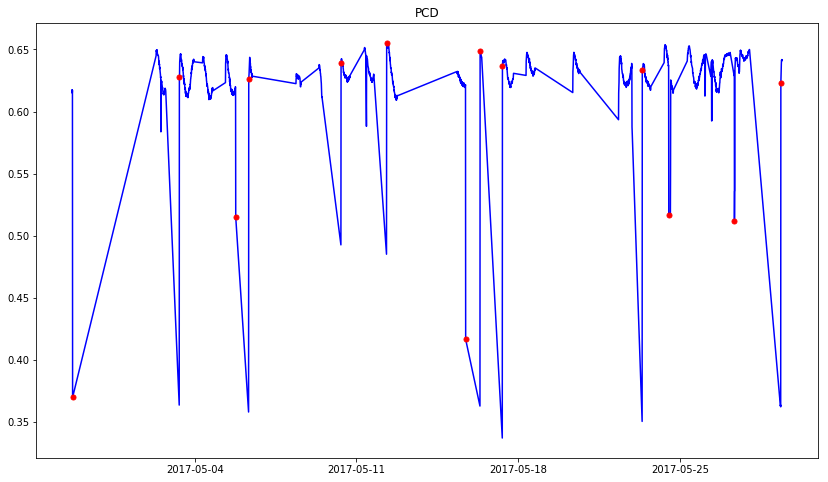

In [240]:
plot_col_outlier_scatter(model1_10min.loc[1345840:1347180],model1_10min_powerstep.loc[1345840:1347180],'pcd',psn=12)

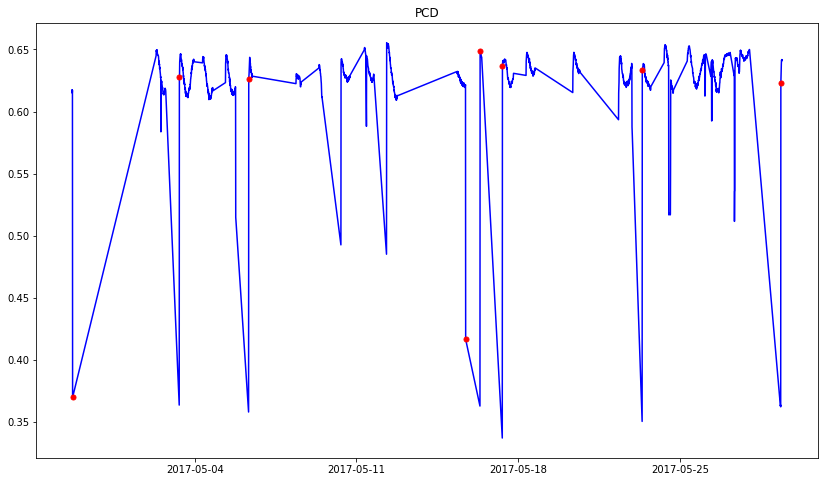

In [217]:
plot_col_outlier_scatter(model1_10min.loc[1345840:1347180],model1_10min_powerstep.loc[1345840:1347180],'pcd',psn=12)

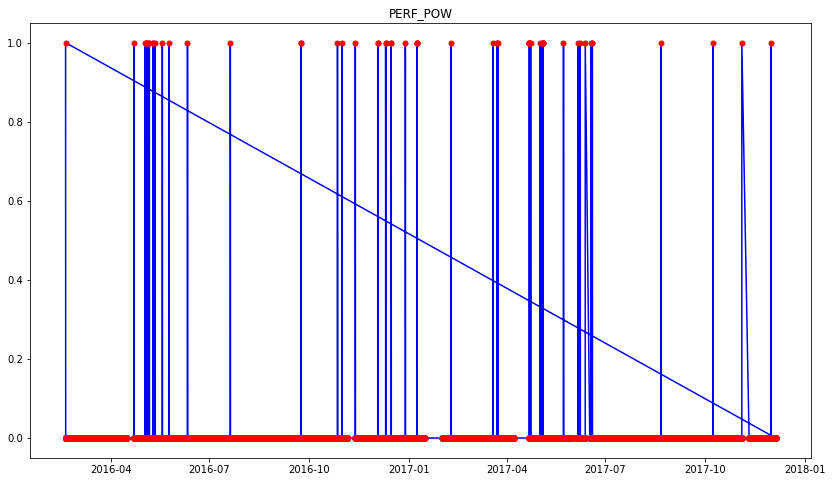

In [227]:
plot_col_outlier_scatter (model2_10min_powerstep,model2_10min,'perf_pow',psn=56)